### Get Data

In [1]:
# importing all necessary libraries
import pandas as pd

# define the dataset location
filename = 'trainData.csv'

# load the csv file as a data frame, header as 1st row and missing values as '?'
df = pd.read_csv(filename, header=0, na_values='?')

### Inspect and Visualize Data

In [2]:
# print first 5 rows of df
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,u,g,0.00,w,0,True,v,1.25,True,1,False,202.0,g,Success
1,a,58.67,u,g,4.46,q,560,True,h,3.04,True,6,False,43.0,g,Success
2,a,24.50,u,g,0.50,q,824,False,h,1.50,True,0,False,280.0,g,Success
3,b,27.83,u,g,1.54,w,3,True,v,3.75,True,5,True,100.0,g,Success
4,b,25.00,u,g,11.25,c,1208,True,v,2.50,True,17,False,200.0,g,Success


In [3]:
# rows and columns of df
df.shape

(552, 16)

In [4]:
# info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      544 non-null    object 
 1   A2      542 non-null    float64
 2   A3      548 non-null    object 
 3   A4      548 non-null    object 
 4   A5      552 non-null    float64
 5   A6      546 non-null    object 
 6   A7      552 non-null    int64  
 7   A8      552 non-null    bool   
 8   A9      546 non-null    object 
 9   A10     552 non-null    float64
 10  A11     552 non-null    bool   
 11  A12     552 non-null    int64  
 12  A13     552 non-null    bool   
 13  A14     542 non-null    float64
 14  A15     552 non-null    object 
 15  A16     552 non-null    object 
dtypes: bool(3), float64(4), int64(2), object(7)
memory usage: 57.8+ KB


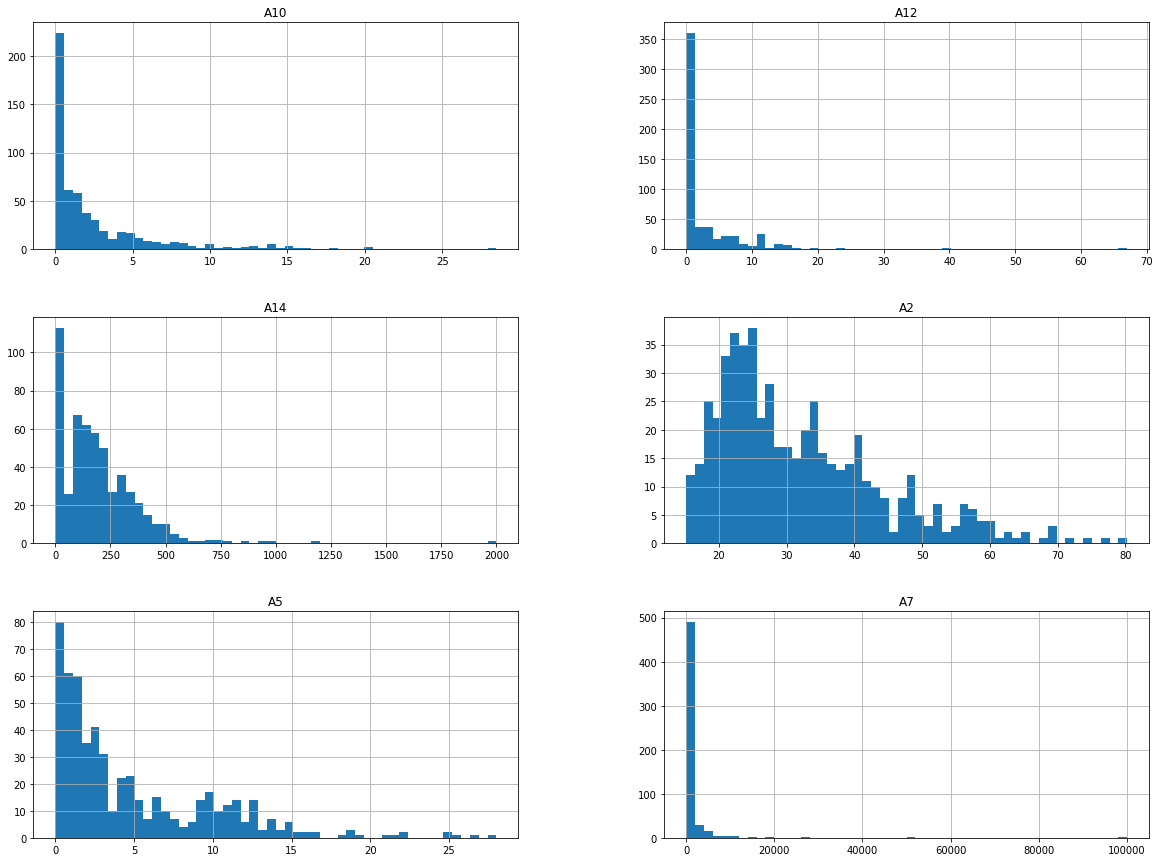

In [5]:
import matplotlib.pyplot as plt

# select columns with numerical data types
num_ix = df.select_dtypes(include=['int64', 'float64']).columns

# select a subset of the dataframe with the chosen columns
subset = df[num_ix]


# create a histogram plot of each numeric variable
subset.hist(bins=50, figsize=(20,15))
plt.show()

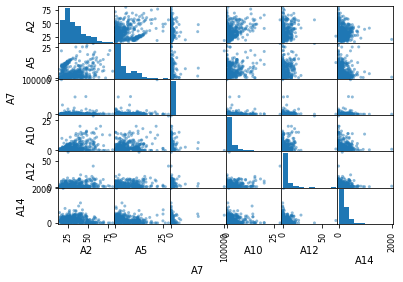

In [6]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix

scatter_matrix(subset)
plt.show()

           A2        A5        A7        A8       A10       A11       A12  \
A2   1.000000  0.212254  0.015380  0.119881  0.403760  0.204746  0.198766   
A5   0.212254  1.000000  0.131593  0.174585  0.299239  0.240086  0.269120   
A7   0.015380  0.131593  1.000000  0.085024  0.036480  0.065463  0.058838   
A8   0.119881  0.174585  0.085024  1.000000  0.219907  0.442059  0.565424   
A10  0.403760  0.299239  0.036480  0.219907  1.000000  0.340203  0.313728   
A11  0.204746  0.240086  0.065463  0.442059  0.340203  1.000000  0.362627   
A12  0.198766  0.269120  0.058838  0.565424  0.313728  0.362627  1.000000   
A13  0.058597  0.007335  0.016167 -0.022548  0.141929  0.121360  0.005165   
A14 -0.094696 -0.208227  0.079357 -0.096143 -0.092618 -0.081208 -0.127201   

          A13       A14  
A2   0.058597 -0.094696  
A5   0.007335 -0.208227  
A7   0.016167  0.079357  
A8  -0.022548 -0.096143  
A10  0.141929 -0.092618  
A11  0.121360 -0.081208  
A12  0.005165 -0.127201  
A13  1.000000  0.1365

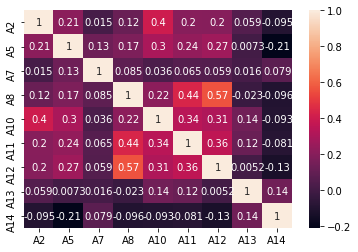

In [7]:
# Correlation Matrix Plot
import numpy as np
import seaborn as sn

corrMatrix = df.corr()
print (corrMatrix)

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
# There is NO strong correlation between features

In [9]:
# summarize missing value count for each column
df.isnull().sum()

A1      8
A2     10
A3      4
A4      4
A5      0
A6      6
A7      0
A8      0
A9      6
A10     0
A11     0
A12     0
A13     0
A14    10
A15     0
A16     0
dtype: int64

In [10]:
# summarize missing value count for each row
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print('Total number of missing rows: %d' % len(rows_with_NaN))

Total number of missing rows: 28


### Split target feature and train set

In [11]:
from collections import Counter

# summarize the class distribution
target = df.values[:, -1]     # get the last column
counter = Counter(target)
for k, v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=Success, Count=255, Percentage=46.196%
Class=Failure, Count=297, Percentage=53.804%


In [12]:
last_ix = df.columns[len(df.columns) - 1]
X, y = df.drop(last_ix, axis=1), df[last_ix]

print(X, y)

    A1     A2 A3 A4      A5 A6    A7     A8 A9    A10    A11  A12    A13  \
0    b  30.83  u  g   0.000  w     0   True  v  1.250   True    1  False   
1    a  58.67  u  g   4.460  q   560   True  h  3.040   True    6  False   
2    a  24.50  u  g   0.500  q   824  False  h  1.500   True    0  False   
3    b  27.83  u  g   1.540  w     3   True  v  3.750   True    5   True   
4    b  25.00  u  g  11.250  c  1208   True  v  2.500   True   17  False   
..  ..    ... .. ..     ... ..   ...    ... ..    ...    ...  ...    ...   
547  b  39.17  u  g   1.625  c  4700   True  v  1.500   True   10  False   
548  b  39.08  u  g   6.000  m  1097   True  v  1.290   True    5   True   
549  b  31.67  u  g   0.830  x  3290   True  v  1.335   True    8   True   
550  b  41.00  u  g   0.040  e     0   True  v  0.040  False    1  False   
551  b  48.50  u  g   4.250  m     0  False  v  0.125   True    0   True   

       A14 A15  
0    202.0   g  
1     43.0   g  
2    280.0   g  
3    100.0   g  
4 

In [13]:
X.isnull().sum()

A1      8
A2     10
A3      4
A4      4
A5      0
A6      6
A7      0
A8      0
A9      6
A10     0
A11     0
A12     0
A13     0
A14    10
A15     0
dtype: int64

### Impute missing data, Encode & Normalize data

In [14]:
# select categorical and numerical features
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
num_ix = X.select_dtypes(include=['int64', 'float64']).columns

print(cat_ix)
print(num_ix)

Index(['A1', 'A3', 'A4', 'A6', 'A8', 'A9', 'A11', 'A13', 'A15'], dtype='object')
Index(['A2', 'A5', 'A7', 'A10', 'A12', 'A14'], dtype='object')


In [15]:
from sklearn.impute import SimpleImputer

# fill missing values with mean column values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

values = X[num_ix].values
X[num_ix] = imp_mean.fit_transform(values)

In [16]:
print(X[num_ix].isnull().sum())

A2     0
A5     0
A7     0
A10    0
A12    0
A14    0
dtype: int64


In [17]:
# fill categorial missing values with most frequent
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

values = X[cat_ix].values
X[cat_ix] = imp_freq.fit_transform(values)

In [18]:
print(X[cat_ix].isnull().sum())

A1     0
A3     0
A4     0
A6     0
A8     0
A9     0
A11    0
A13    0
A15    0
dtype: int64


In [19]:
print(X)

    A1     A2 A3 A4      A5 A6      A7     A8 A9    A10    A11   A12    A13  \
0    b  30.83  u  g   0.000  w     0.0   True  v  1.250   True   1.0  False   
1    a  58.67  u  g   4.460  q   560.0   True  h  3.040   True   6.0  False   
2    a  24.50  u  g   0.500  q   824.0  False  h  1.500   True   0.0  False   
3    b  27.83  u  g   1.540  w     3.0   True  v  3.750   True   5.0   True   
4    b  25.00  u  g  11.250  c  1208.0   True  v  2.500   True  17.0  False   
..  ..    ... .. ..     ... ..     ...    ... ..    ...    ...   ...    ...   
547  b  39.17  u  g   1.625  c  4700.0   True  v  1.500   True  10.0  False   
548  b  39.08  u  g   6.000  m  1097.0   True  v  1.290   True   5.0   True   
549  b  31.67  u  g   0.830  x  3290.0   True  v  1.335   True   8.0   True   
550  b  41.00  u  g   0.040  e     0.0   True  v  0.040  False   1.0  False   
551  b  48.50  u  g   4.250  m     0.0  False  v  0.125   True   0.0   True   

       A14 A15  
0    202.0   g  
1     43.0   g  


In [20]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

# label encode the target variable to have the classes 0 and 1
y_train = labelencoder.fit_transform(y)

for i in range (len(cat_ix)):
    # Assigning numerical values for categorial values
    X[cat_ix[i]] = LabelEncoder().fit_transform(X[cat_ix[i]])
    
min_max_scaler = MinMaxScaler()
X[num_ix] = min_max_scaler.fit_transform(X[num_ix])
X_train = X

In [21]:
X_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,0.240627,1,0,0.000000,12,0.00000,1,7,0.043860,1,0.014925,0,0.1010,0
1,0,0.668408,1,0,0.159286,10,0.00560,1,3,0.106667,1,0.089552,0,0.0215,0
2,0,0.143362,1,0,0.017857,10,0.00824,0,3,0.052632,1,0.000000,0,0.1400,0
3,1,0.194530,1,0,0.055000,12,0.00003,1,7,0.131579,1,0.074627,1,0.0500,0
4,1,0.151045,1,0,0.401786,1,0.01208,1,7,0.087719,1,0.253731,0,0.1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,1,0.368777,1,0,0.058036,1,0.04700,1,7,0.052632,1,0.149254,0,0.0930,0
548,1,0.367394,1,0,0.214286,9,0.01097,1,7,0.045263,1,0.074627,1,0.0540,0
549,1,0.253534,1,0,0.029643,13,0.03290,1,7,0.046842,1,0.119403,1,0.1515,0
550,1,0.396896,1,0,0.001429,4,0.00000,1,7,0.001404,0,0.014925,0,0.2800,2


In [22]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

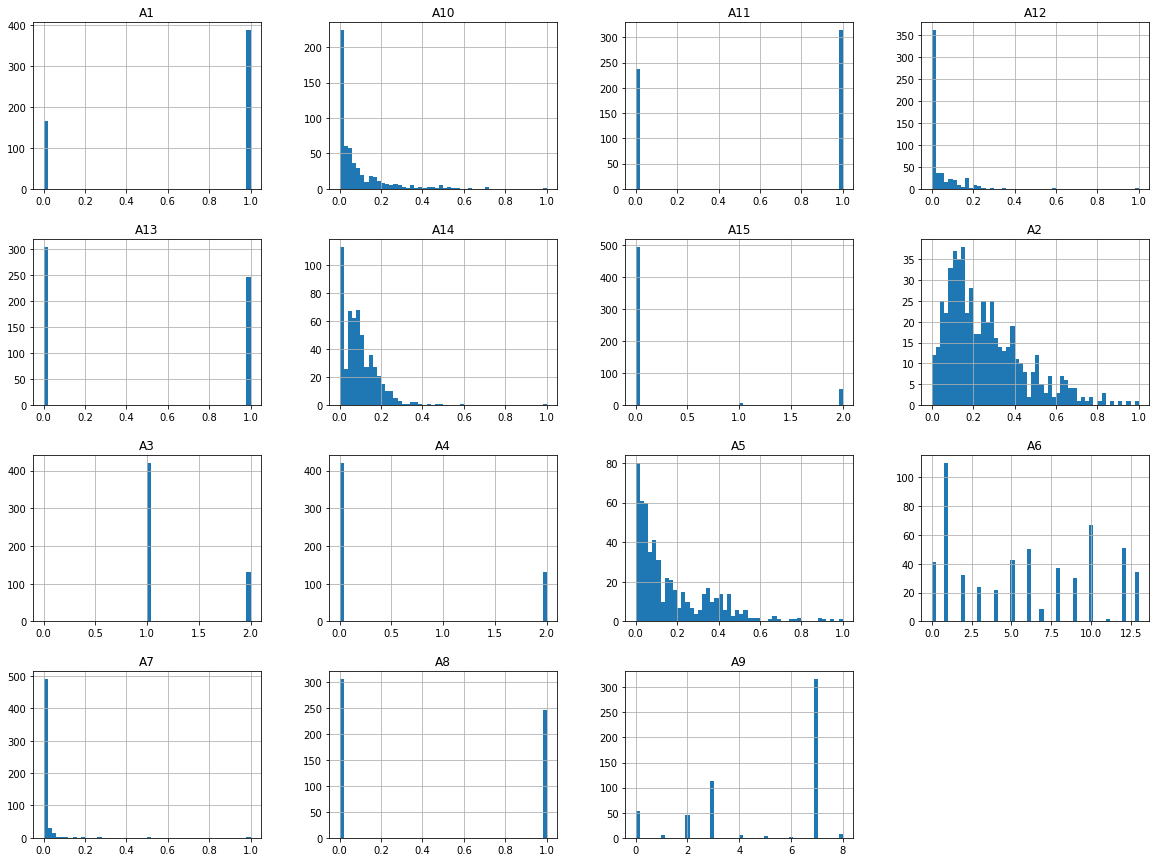

In [23]:
# create a histogram plot
X_train.hist(bins=50, figsize=(20,15))
plt.show()

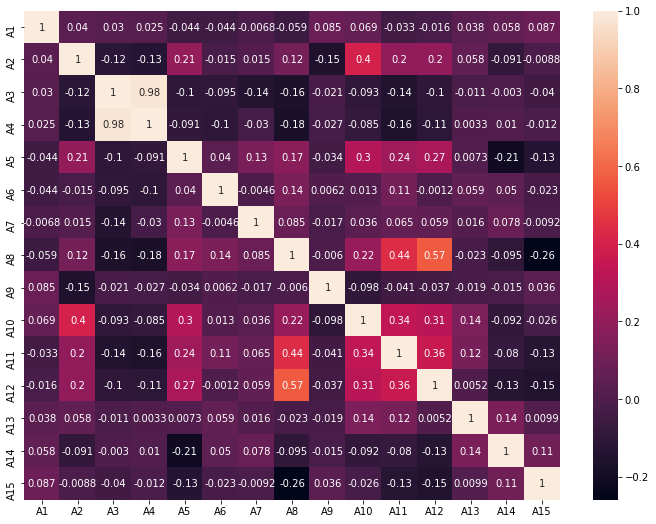

In [24]:
corrMatrix = X_train.corr()

fig = plt.figure(figsize = (12, 9))
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Define Classifeir for Predictions

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Import and Preprocess test dataset

In [26]:
# read test data file
test_df = pd.read_csv('testdata.csv', header=0, na_values='?')

# select categorical and numerical features
cat_ix_test = test_df.select_dtypes(include=['object', 'bool']).columns
num_ix_test = test_df.select_dtypes(include=['int64', 'float64']).columns

In [27]:
test_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,32.67,y,p,9.00,w,0,False,h,5.25,True,0,True,154.0,g
1,a,28.08,y,p,15.00,e,13212,False,z,0.00,True,0,False,0.0,g
2,b,73.42,u,g,17.75,ff,0,False,ff,0.00,True,0,True,0.0,g
3,b,64.08,u,g,20.00,x,1000,True,h,17.50,True,9,True,0.0,g
4,b,51.58,u,g,15.00,c,0,True,v,8.50,True,9,False,0.0,g


In [28]:
test_df.isnull().sum()

A1     4
A2     2
A3     2
A4     2
A5     0
A6     3
A7     0
A8     0
A9     3
A10    0
A11    0
A12    0
A13    0
A14    3
A15    0
dtype: int64

In [29]:
test_df.shape

(138, 15)

### Encode, Impute and Noramalize dataset

In [30]:
# fill missing values with mean column values
values = test_df[num_ix_test].values
test_df[num_ix_test] = imp_mean.fit_transform(values)

# fill categorial missing values with most frequent
values = test_df[cat_ix_test].values
test_df[cat_ix_test] = imp_freq.fit_transform(values)

In [31]:
test_df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
dtype: int64

In [32]:
# Label encode & Normalize

for i in range (len(cat_ix)):
    # Assigning numerical values for categorial values
    test_df[cat_ix_test[i]] = LabelEncoder().fit_transform(test_df[cat_ix_test[i]])
    
min_max_scaler = MinMaxScaler()
test_df[num_ix_test] = min_max_scaler.fit_transform(test_df[num_ix_test])

In [33]:
test_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,0.317077,1,1,0.4500,12,0.000000,0,2,0.300000,1,0.000000,1,0.296154,0
1,0,0.240154,1,1,0.7500,4,0.422311,0,6,0.000000,1,0.000000,0,0.000000,0
2,1,1.000000,0,0,0.8875,5,0.000000,0,1,0.000000,1,0.000000,1,0.000000,0
3,1,0.843472,0,0,1.0000,13,0.031964,1,2,1.000000,1,0.473684,1,0.000000,0
4,1,0.633987,0,0,0.7500,1,0.000000,1,5,0.485714,1,0.473684,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,0.283560,0,0,0.6000,1,0.000607,1,5,0.114286,1,0.052632,0,0.423077,0
134,1,0.121502,1,1,0.2395,12,0.009589,1,5,0.128571,1,0.052632,1,0.153846,0
135,1,0.000000,1,1,0.2000,12,0.031964,1,5,0.100000,1,0.105263,1,0.230769,0
136,0,0.540473,0,0,0.2000,7,0.030686,0,3,0.000000,1,0.000000,0,0.192308,0


In [34]:
test_df[num_ix_test] = min_max_scaler.fit_transform(test_df[num_ix_test])
test_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,0.317077,1,1,0.4500,12,0.000000,0,2,0.300000,1,0.000000,1,0.296154,0
1,0,0.240154,1,1,0.7500,4,0.422311,0,6,0.000000,1,0.000000,0,0.000000,0
2,1,1.000000,0,0,0.8875,5,0.000000,0,1,0.000000,1,0.000000,1,0.000000,0
3,1,0.843472,0,0,1.0000,13,0.031964,1,2,1.000000,1,0.473684,1,0.000000,0
4,1,0.633987,0,0,0.7500,1,0.000000,1,5,0.485714,1,0.473684,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,0.283560,0,0,0.6000,1,0.000607,1,5,0.114286,1,0.052632,0,0.423077,0
134,1,0.121502,1,1,0.2395,12,0.009589,1,5,0.128571,1,0.052632,1,0.153846,0
135,1,0.000000,1,1,0.2000,12,0.031964,1,5,0.100000,1,0.105263,1,0.230769,0
136,0,0.540473,0,0,0.2000,7,0.030686,0,3,0.000000,1,0.000000,0,0.192308,0


### Make predictions

In [35]:
# initialize a list to store result
result_list = list()


# make prediction
y_pred = model.predict(test_df)

for i in y_pred:
    # convert predictions
    result_list.append('Success' if i == 1 else 'Failure')
    
# convert predicted list to a dataset
result_list = pd.DataFrame(result_list)
id_list = pd.DataFrame(np.arange(1, y_pred.shape[0]+1))

pred_df = pd.concat([id_list,result_list], axis=1)
pred_df.columns = ['Id', 'Category']



# export result as a CSV file
pred_df.to_csv("output.csv", index=False)

# print result dataframe
pred_df

,Id,Category
0,1,Success
1,2,Success
2,3,Failure
3,4,Success
4,5,Success
...,...,...
133,134,Success
134,135,Success
135,136,Success
136,137,Success
